In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from utils import *
from utils_plotting import *

In [3]:
sns.set(style='ticks')

# Prepare data

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left
Removing R > 22: 33587 left


In [5]:
catalog_star = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_rf_f-all_cut-r__2018-04-16_11:12:22.csv')
catalog_non_star = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_non-star_sdss-clean_rf_f-all_cut-r__2018-04-16_11:16:30.csv')

print(catalog_star.shape)
print(catalog_non_star.shape)

(1147110, 20)
(1545091, 20)


In [6]:
for catalog in [catalog_star, catalog_non_star]:
    catalog['train'] = catalog['ID'].isin(kids_x_sdss['ID'])

catalog = pd.concat([catalog_star, catalog_non_star])
print(catalog.shape)

(2692201, 21)


In [7]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [8]:
qso_catalog_star = catalog_star.loc[catalog_star['CLASS'] == 'QSO']
qso_catalog_non_star = catalog_non_star.loc[catalog_non_star['CLASS'] == 'QSO']

In [9]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [10]:
catalog_star_sampled = catalog_star.sample(20000, random_state=78356)
catalog_non_star_sampled = catalog_non_star.sample(20000, random_state=78356)

In [11]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [12]:
kids_x_sdss_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5]
kids_x_sdss_non_star = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] <= 0.5]

In [13]:
catalog_star_non_train = catalog_star.loc[catalog_star['train'] == False]
qso_catalog_star_non_train = qso_catalog_star.loc[qso_catalog_star['train'] == False]

In [14]:
print(qso_catalog_star.shape[0])
print(qso_catalog_non_star.shape[0])

148212
11451


In [14]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([17107,  6084, 10396]),
 array([50.93339685, 18.11415131, 30.95245184]))

In [15]:
describe_column(kids_x_sdss_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  133,  5634, 10315]),
 array([ 0.82701157, 35.0329561 , 64.14003233]))

In [15]:
describe_column(kids_x_sdss_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([16974,   450,    81]),
 array([96.96658098,  2.57069409,  0.46272494]))

In [16]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1536894,  159663,  995644]),
 array([57.08689656,  5.93057502, 36.98252842]))

In [17]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([990326, 106831, 722752]),
 array([54.4162373 ,  5.87012867, 39.71363403]))

In [18]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([546568,  52832, 272892]),
 array([62.65883443,  6.05668744, 31.28447813]))

In [19]:
describe_column(catalog_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  5652, 148212, 993246]),
 array([ 0.49271648, 12.9204697 , 86.58681382]))

In [20]:
describe_column(catalog_non_star['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([1531242,   11451,    2398]),
 array([99.10367739,  0.7411214 ,  0.15520121]))

# Photo catalogs

Catalog size: 2692201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1536894,  159663,  995644]), array([57.08689656,  5.93057502, 36.98252842]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
external catalog x KiDS size: 19930
external catalog x KiDS catalog size: 15005, train elements: 3035
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  748, 12935,  1322]), array([ 4.985005  , 86.20459847,  8.81039653]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  723, 10004,  1243]), array([ 6.04010025, 83.57560568, 10.38429407]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
external catalog x KiDS size: 22368
external catalog x KiDS catalog size: 15990, train elements: 3430
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  423, 14537,  1030]), array([ 2.64540338, 90.91307067,  6.44152595]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  405, 11140,  1015]), array([ 3.22452229, 88.69426752,  8.08121019]))
--------------------
KiDS.DR3.x.QSO.GALEX.csv
external catalog x KiDS size: 70749
external catalog x KiDS catalog size: 37377, train elements: 5899
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 3489, 28393,  5495]), array([ 9.33461755, 75.96382802, 14.70155443]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 3384, 23020,  5074]), array([10.75036533, 73.13044031, 16.11919436]))


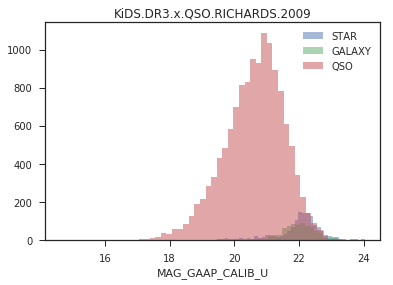

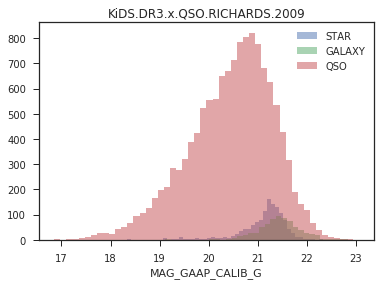

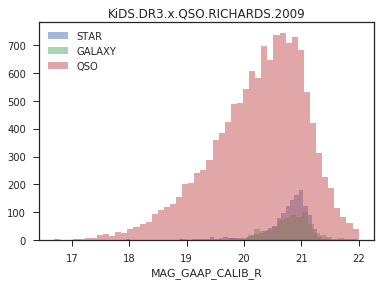

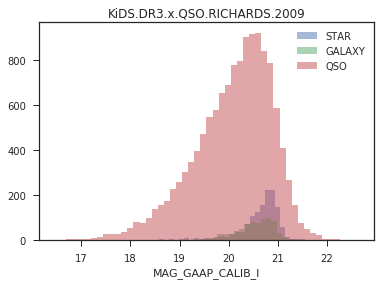

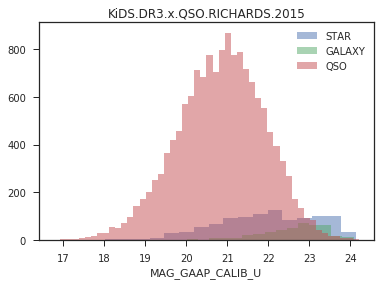

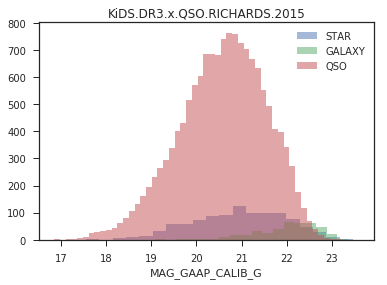

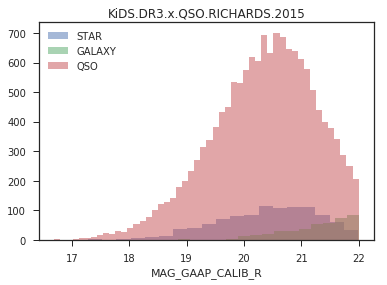

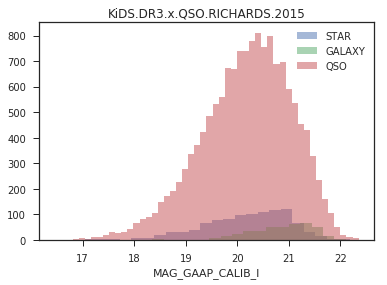

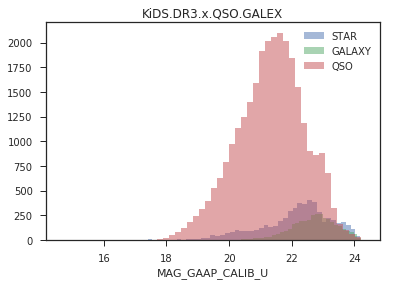

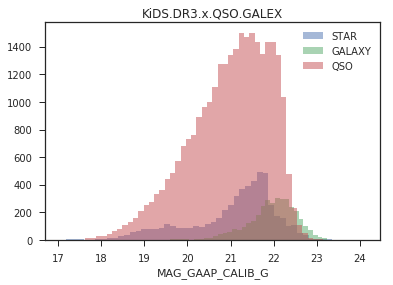

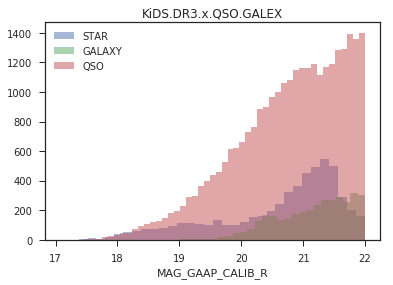

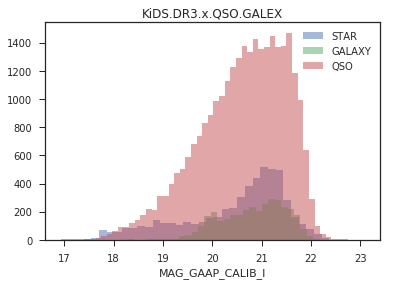

In [36]:
test_external_qso(catalog, save=False)

In [30]:
test_external_qso(catalog_star, save=False)

Catalog size: 1147110
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  5652, 148212, 993246]), array([ 0.49271648, 12.9204697 , 86.58681382]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
external catalog x KiDS size: 19930
external catalog x KiDS catalog size: 13944, train elements: 2987
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   59, 12568,  1317]), array([ 0.42312106, 90.1319564 ,  9.44492255]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  44, 9675, 1238]), array([ 0.40156977, 88.29971708, 11.29871315]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
external catalog x KiDS size: 22368
external catalog x KiDS catalog size: 15374, train elements: 3380
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  118, 14231,  1025]), array([ 0.7675296 , 92.56537011,  6.6671003 ]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  106, 10878,  101

In [31]:
test_external_qso(catalog_non_star, save=False)

Catalog size: 1545091
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1531242,   11451,    2398]), array([99.10367739,  0.7411214 ,  0.15520121]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2009.csv
external catalog x KiDS size: 19930
external catalog x KiDS catalog size: 1061, train elements: 48
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([689, 367,   5]), array([64.93873704, 34.59000943,  0.47125353]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([679, 329,   5]), array([67.02862784, 32.47778875,  0.49358342]))
--------------------
KiDS.DR3.x.QSO.RICHARDS.2015.csv
external catalog x KiDS size: 22368
external catalog x KiDS catalog size: 616, train elements: 50
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([305, 306,   5]), array([49.51298701, 49.67532468,  0.81168831]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([299, 262,   5]), array([52.82685512, 

# GAIA test

In [14]:
def limit_qsos(row, threshold):
    if row['QSO'] > threshold:
        return 'QSO'
    else:
        return 'OTHER'

catalog['CLASS_ALT'] = catalog.apply(lambda row: limit_qsos(row, 0.95), axis=1)

In [18]:
kids_x_gaia_path = '/media/snakoneczny/data/backup/KiDS.DR3.x.GAIA.DR2.cols.csv'

catalog size: 1489105
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([598950,  35051, 855104]), array([40.22214686,  2.35382999, 57.42402315]))
--------------------
KiDS.DR3.x.GAIA.DR2.cols.csv
ext. catalog x base set size: 1634368
ext. catalog x base catalog size: 765993, train elements: 12194
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  3106,  20122, 742765]), array([ 0.40548673,  2.62691696, 96.96759631]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  2945,  16411, 734443]), array([ 0.3906877 ,  2.17710557, 97.43220673]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


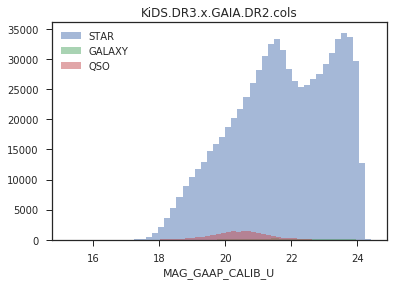

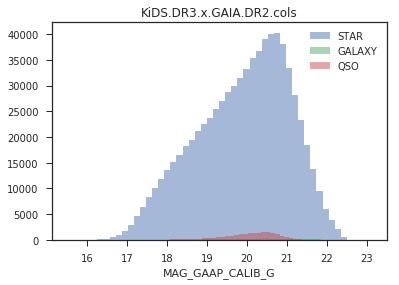

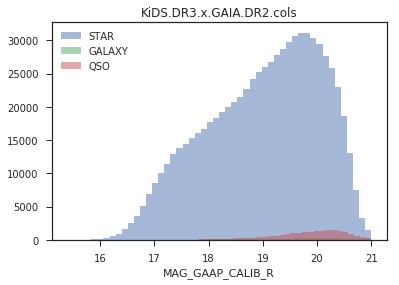

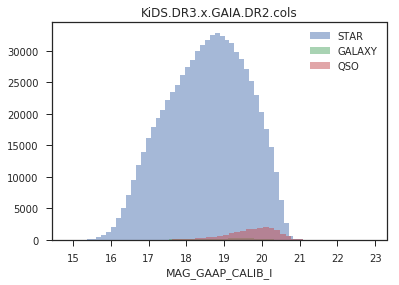

In [22]:
test_gaia(catalog.loc[catalog['MAG_GAAP_CALIB_R'] < 21], kids_x_gaia_path, save=False)

Catalog size: 1489105
(array(['OTHER', 'QSO'], dtype=object), array([1471677,   17428]), array([98.82963256,  1.17036744]))
--------------------
KiDS.DR3.x.GAIA.DR2.coord.csv
external catalog x KiDS size: 1634368
external catalog x KiDS catalog size: 765993, train elements: 12194
catalogs cross:
(array(['OTHER', 'QSO'], dtype=object), array([754077,  11916]), array([98.44437221,  1.55562779]))
catalogs cross, no train:
(array(['OTHER', 'QSO'], dtype=object), array([744706,   9093]), array([98.79371026,  1.20628974]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


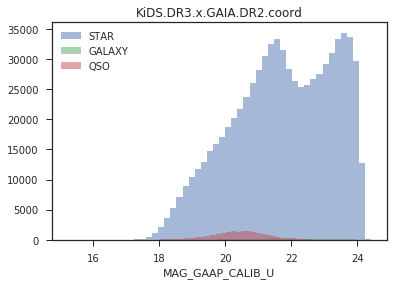

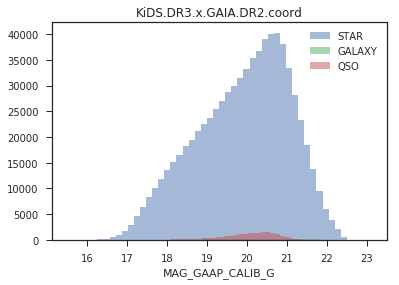

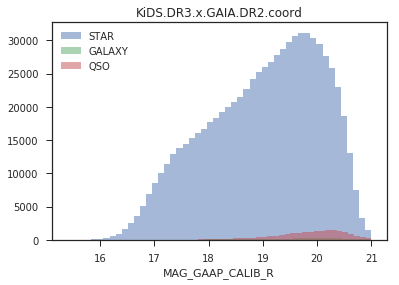

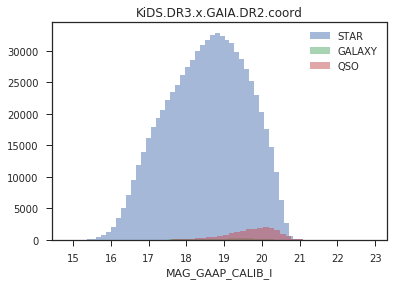

In [30]:
test_gaia(catalog.loc[catalog['MAG_GAAP_CALIB_R'] < 21], class_column='CLASS_ALT', save=False)  # 0.95

Catalog size: 1203096
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([937944, 124612, 140540]), array([77.96086098, 10.3576107 , 11.68152832]))
--------------------
KiDS.DR3.x.GAIA.DR2.coord.csv
external catalog x KiDS size: 1634368
external catalog x KiDS catalog size: 2102, train elements: 22
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  64,  233, 1805]), array([ 3.04471931, 11.08468126, 85.87059943]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  64,  220, 1796]), array([ 3.07692308, 10.57692308, 86.34615385]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


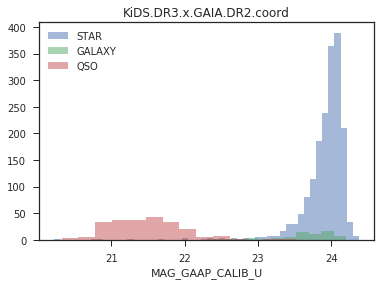

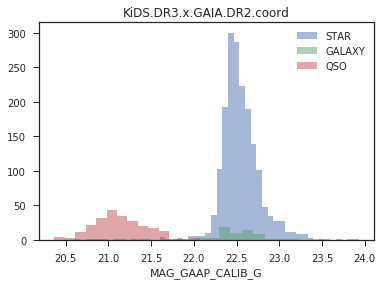

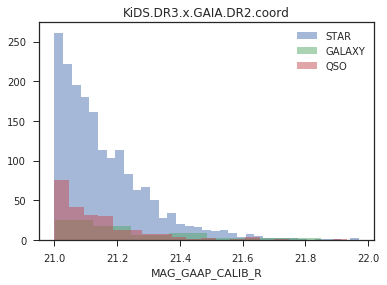

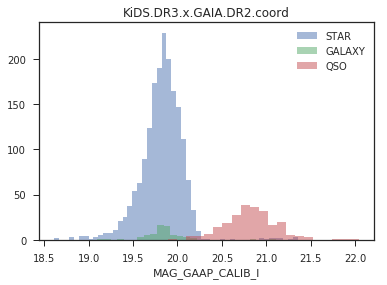

In [15]:
test_gaia(catalog.loc[catalog['MAG_GAAP_CALIB_R'] > 21], save=False)

Catalog size: 2692201
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1536894,  159663,  995644]), array([57.08689656,  5.93057502, 36.98252842]))
--------------------
KiDS.DR3.x.GAIA.DR2.coord.csv
external catalog x KiDS size: 1634368
external catalog x KiDS catalog size: 768095, train elements: 12216
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  3170,  20355, 744570]), array([ 0.41270937,  2.65006282, 96.93722782]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  3009,  16631, 736239]), array([ 0.39807959,  2.20021988, 97.40170054]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


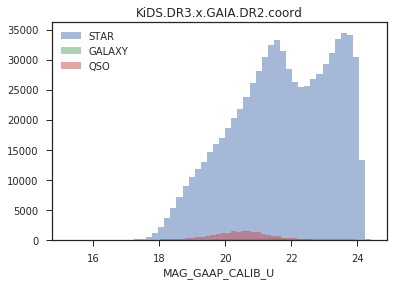

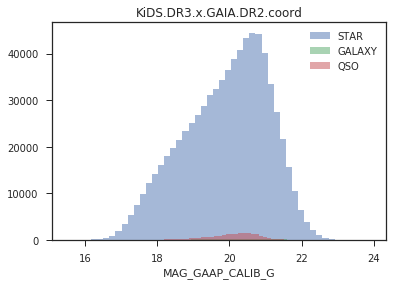

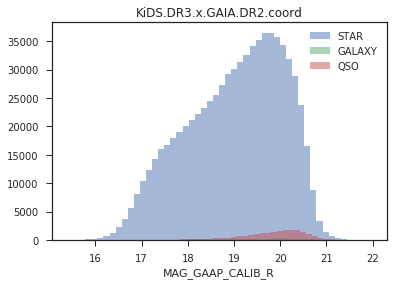

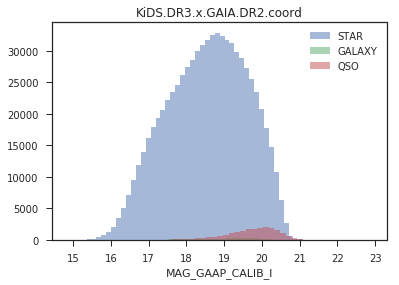

In [17]:
test_gaia(catalog, save=False)

Catalog size: 2692201
(array(['OTHER', 'QSO'], dtype=object), array([2646106,   46095]), array([98.28783215,  1.71216785]))
--------------------
KiDS.DR3.x.GAIA.DR2.coord.csv
external catalog x KiDS size: 1634368
external catalog x KiDS catalog size: 768095, train elements: 12216
catalogs cross:
(array(['OTHER', 'QSO'], dtype=object), array([754109,  13986]), array([98.17913149,  1.82086851]))
catalogs cross, no train:
(array(['OTHER', 'QSO'], dtype=object), array([745050,  10829]), array([98.56736329,  1.43263671]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


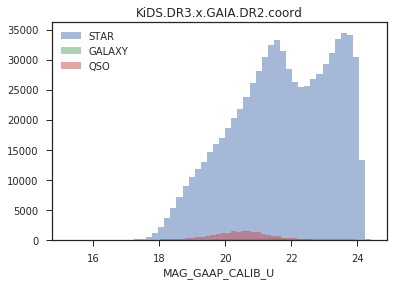

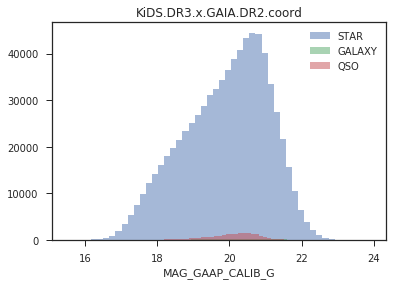

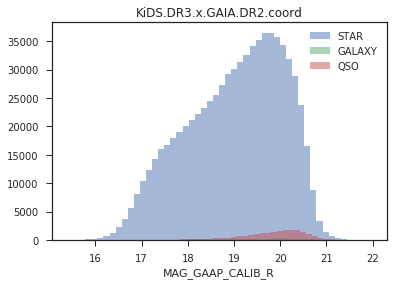

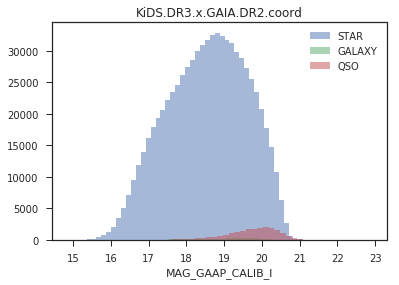

In [27]:
test_gaia(catalog, class_column='CLASS_ALT', save=False)  # 0.9

Catalog size: 1147110
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  5652, 148212, 993246]), array([ 0.49271648, 12.9204697 , 86.58681382]))
--------------------
KiDS.DR3.x.GAIA.DR2.coord.csv
external catalog x KiDS size: 1634368
external catalog x KiDS catalog size: 762899, train elements: 11917
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   298,  19555, 743046]), array([3.90615271e-02, 2.56324887e+00, 9.73976896e+01]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   234,  16004, 734744]), array([3.11592022e-02, 2.13107638e+00, 9.78377644e+01]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


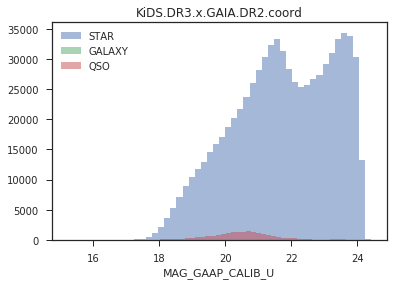

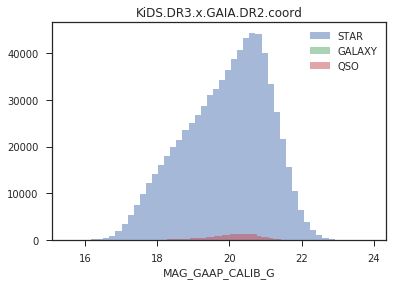

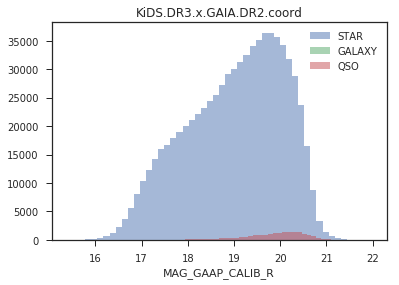

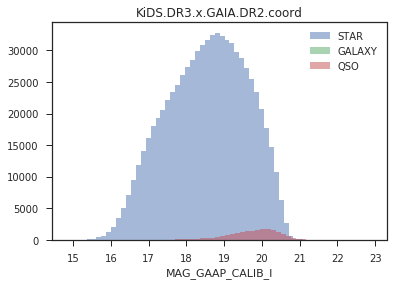

In [18]:
test_gaia(catalog_star, save=False)

Catalog size: 1545091
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([1531242,   11451,    2398]), array([99.10367739,  0.7411214 ,  0.15520121]))
--------------------
KiDS.DR3.x.GAIA.DR2.coord.csv
external catalog x KiDS size: 1634368
external catalog x KiDS catalog size: 5196, train elements: 299
catalogs cross:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2872,  800, 1524]), array([55.27328714, 15.39645881, 29.33025404]))
catalogs cross, no train:
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2775,  627, 1495]), array([56.66734736, 12.8037574 , 30.52889524]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


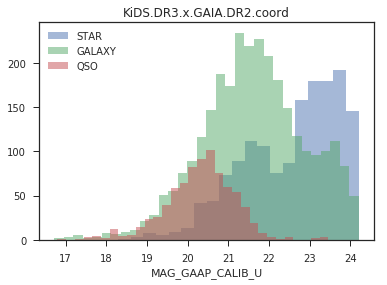

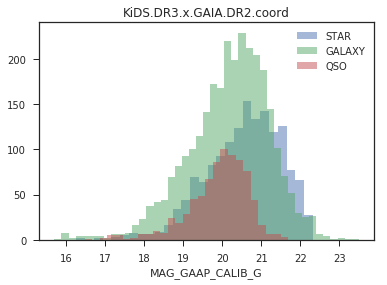

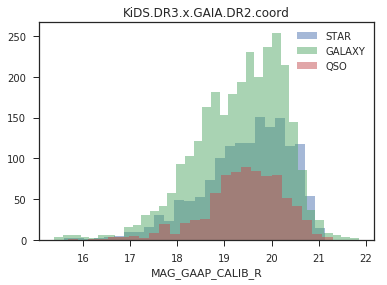

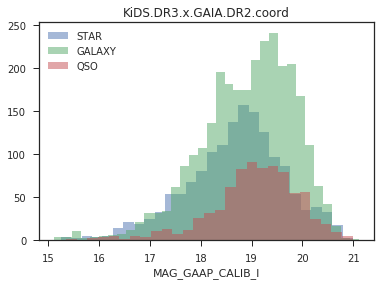

In [19]:
test_gaia(catalog_non_star, save=False)

# t-SNE visualization

## Star

In [21]:
catalog_to_plot = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR'] >= 0.5].sample(10000, random_state=8945)
catalog_to_plot['CLASS'] += '_SDSS'
catalog_to_plot = catalog_to_plot.append(catalog_star.loc[~catalog_star['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [22]:
X = catalog_to_plot[FEATURES['magnitudes-colors-cstar']]
X_scaled = MinMaxScaler().fit_transform(X)

In [23]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

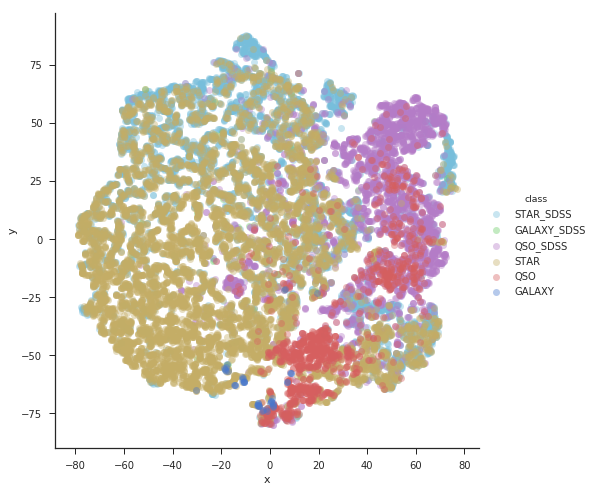

In [24]:
plot_embedding(X_embedded, catalog_to_plot['CLASS'], label='class', alpha=0.4)

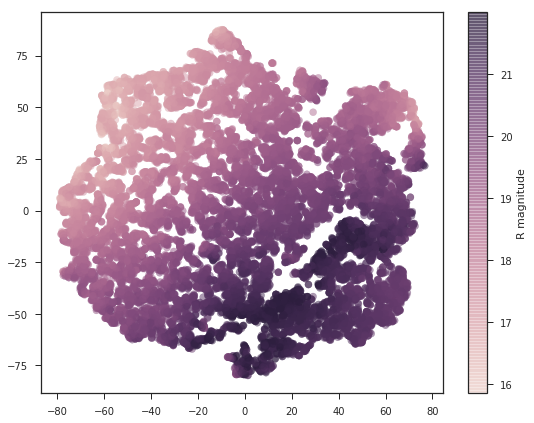

In [21]:
plot_embedding(X_embedded, catalog_to_plot[MAG_GAAP_CALIB_R], label='R magnitude', is_continuous=True)

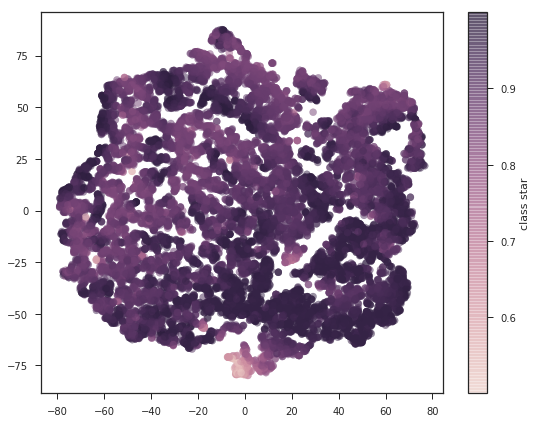

In [22]:
plot_embedding(X_embedded, catalog_to_plot['CLASS_STAR'], label='class star', is_continuous=True)

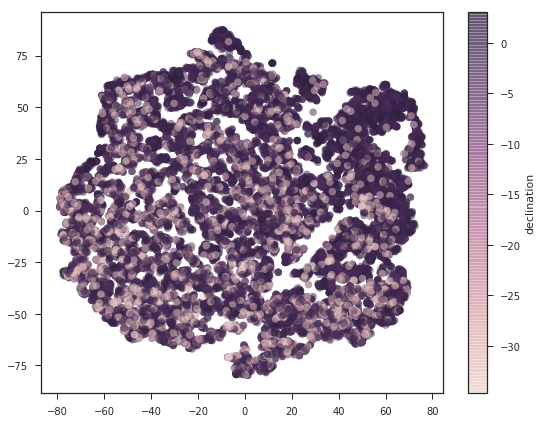

In [25]:
plot_embedding(X_embedded, catalog_to_plot['DECJ2000'], label='declination', is_continuous=True)

## Non-star

In [23]:
catalog_to_plot = kids_x_sdss.loc[kids_x_sdss['CLASS_STAR']<= 0.5].sample(10000, random_state=8945)
catalog_to_plot['CLASS'] += '_SDSS'
catalog_to_plot = catalog_to_plot.append(catalog_non_star.loc[~catalog_non_star['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [24]:
X = catalog_to_plot[FEATURES['magnitudes-colors-cstar']]
X_scaled = MinMaxScaler().fit_transform(X)

In [25]:
X_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                  n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
                  random_state=8934, method='barnes_hut', angle=0.5).fit_transform(X_scaled)

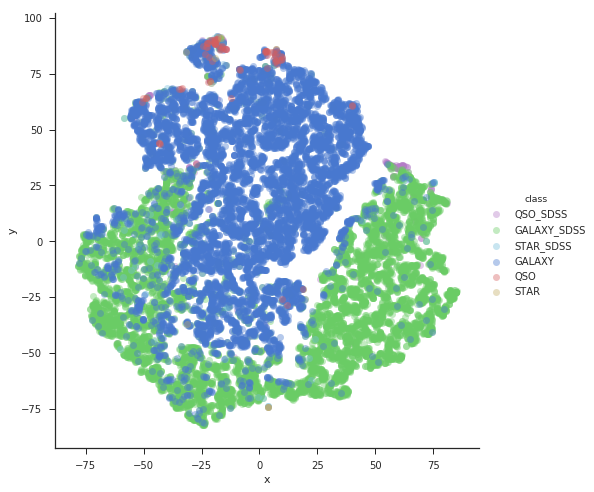

In [26]:
plot_embedding(X_embedded, catalog_to_plot['CLASS'], label='class', alpha=0.4)

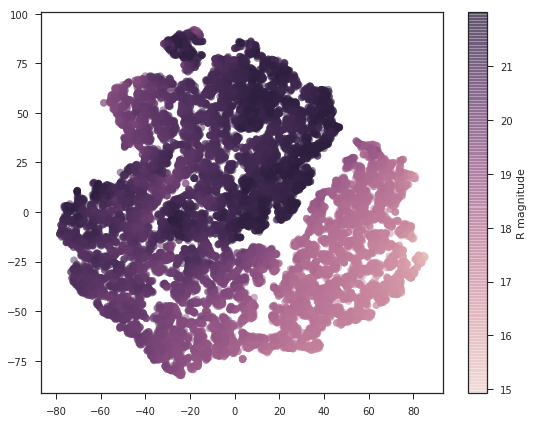

In [27]:
plot_embedding(X_embedded, catalog_to_plot[MAG_GAAP_CALIB_R], label='R magnitude', is_continuous=True)

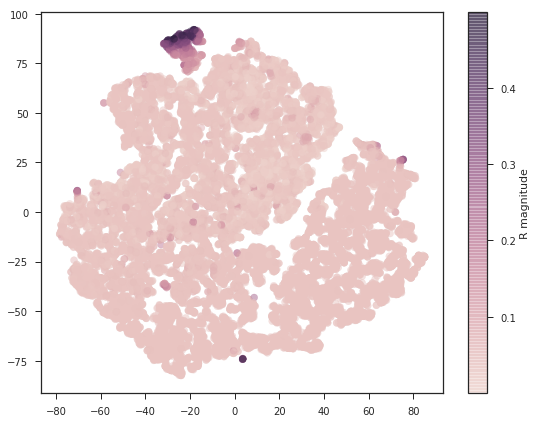

In [28]:
plot_embedding(X_embedded, catalog_to_plot['CLASS_STAR'], label='R magnitude', is_continuous=True)

# Standalone bands

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


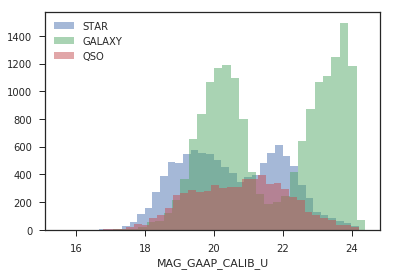

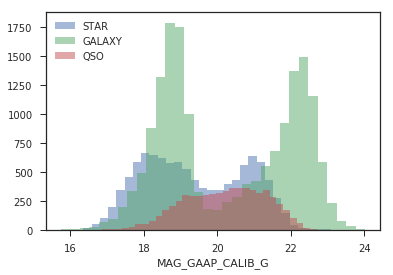

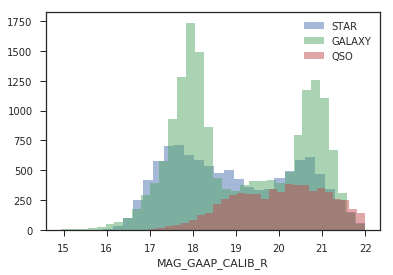

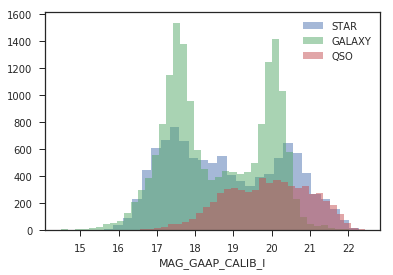

In [20]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


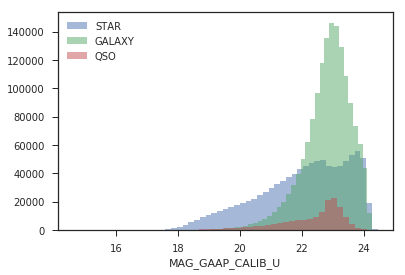

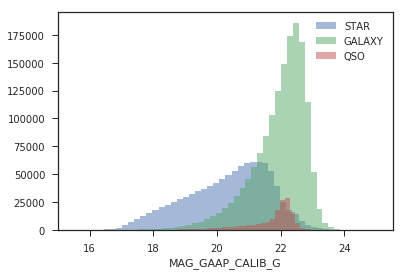

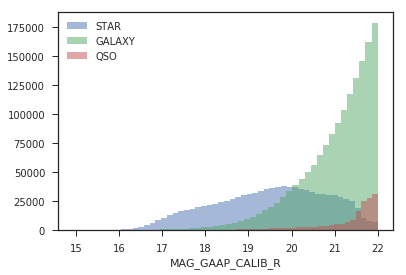

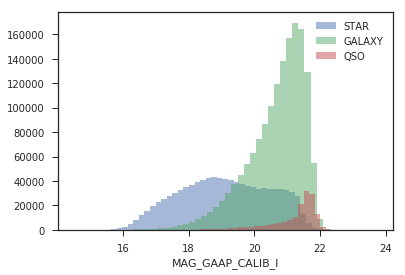

In [21]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


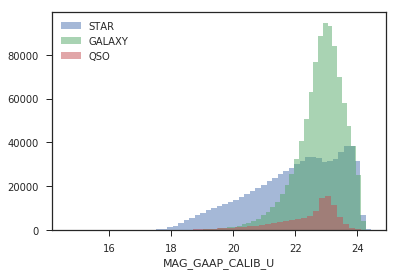

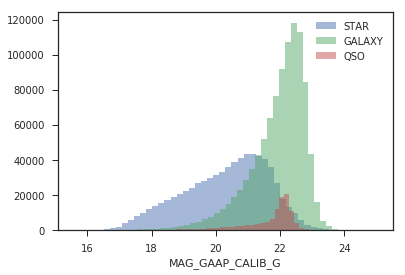

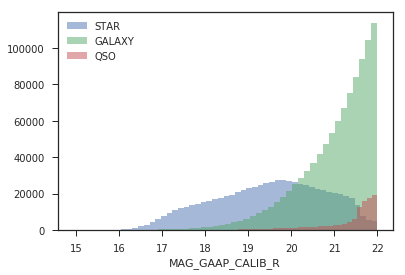

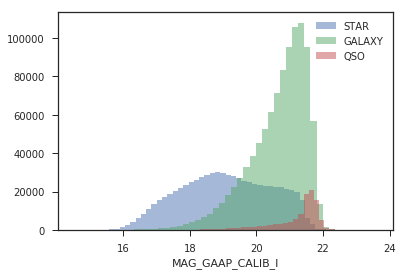

In [22]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


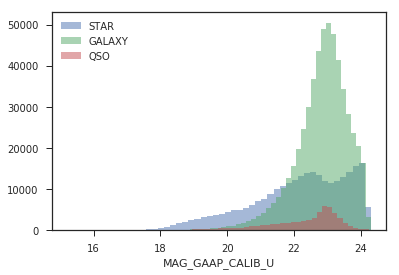

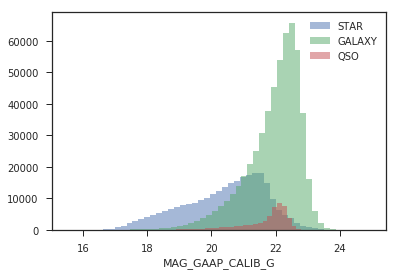

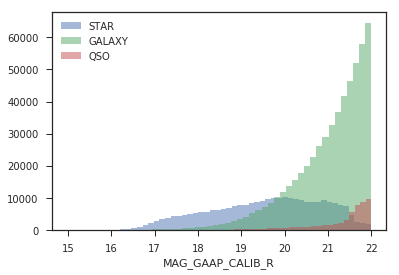

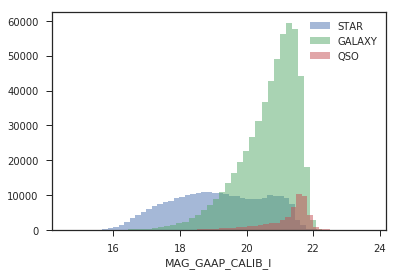

In [23]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

# Paired bands

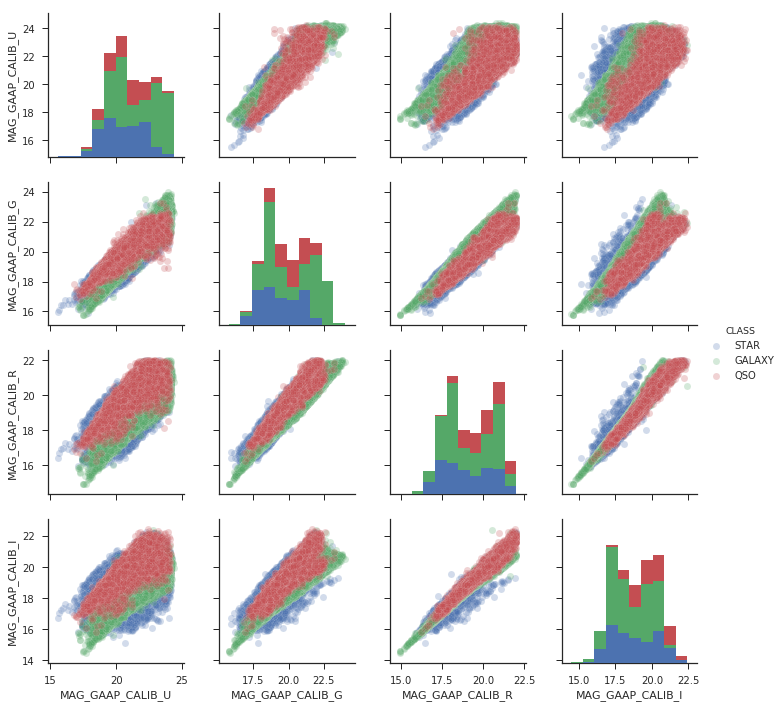

In [24]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

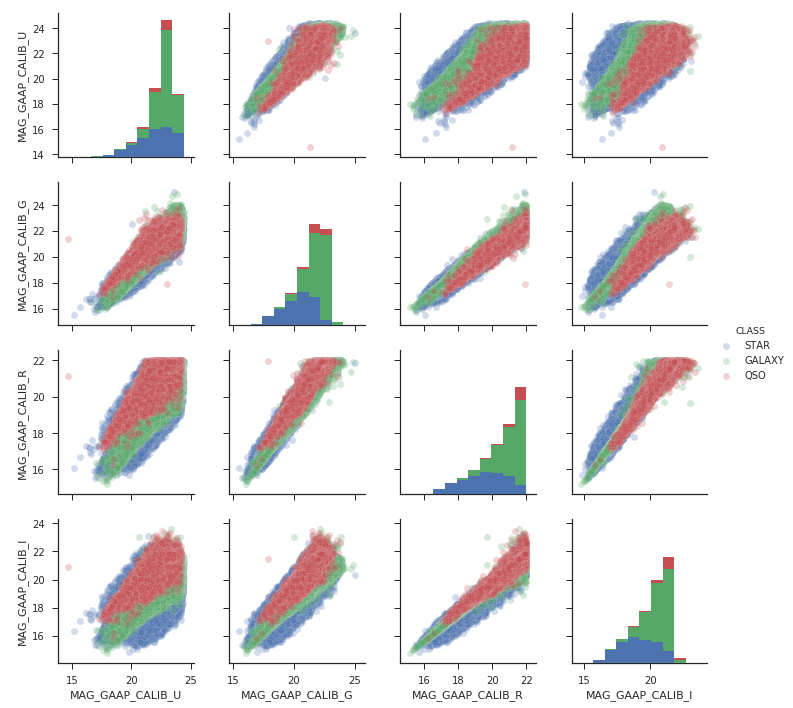

In [25]:
sns.pairplot(catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

# Standalone colors

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


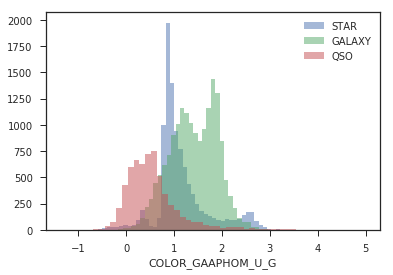

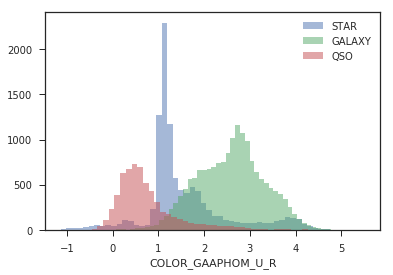

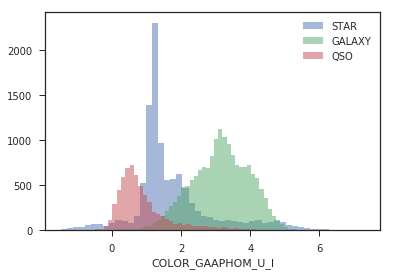

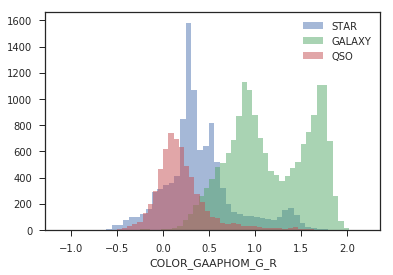

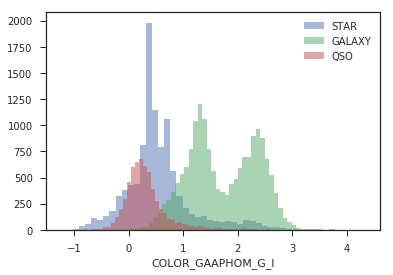

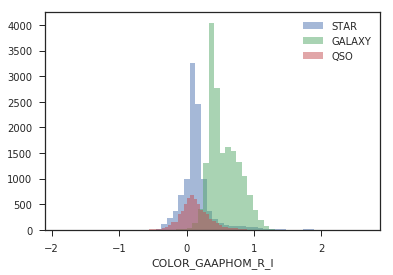

In [26]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


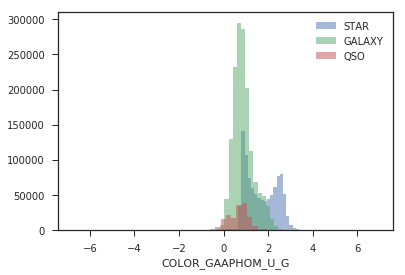

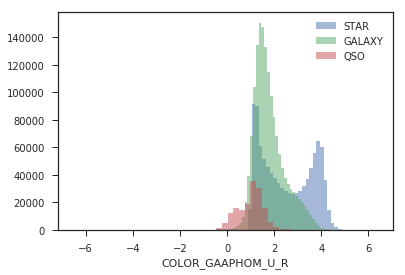

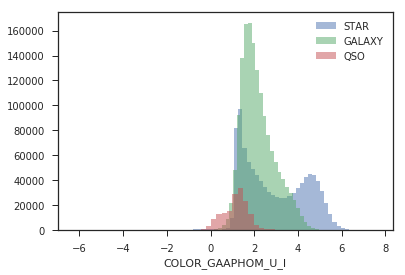

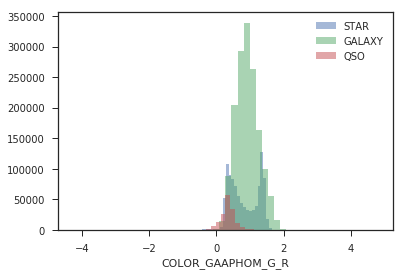

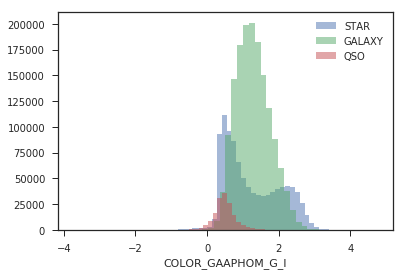

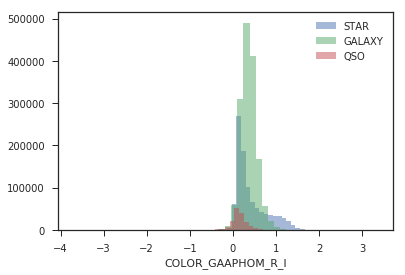

In [27]:
plot_class_histograms(catalog, COLOR_COLUMNS)

# Paired colors

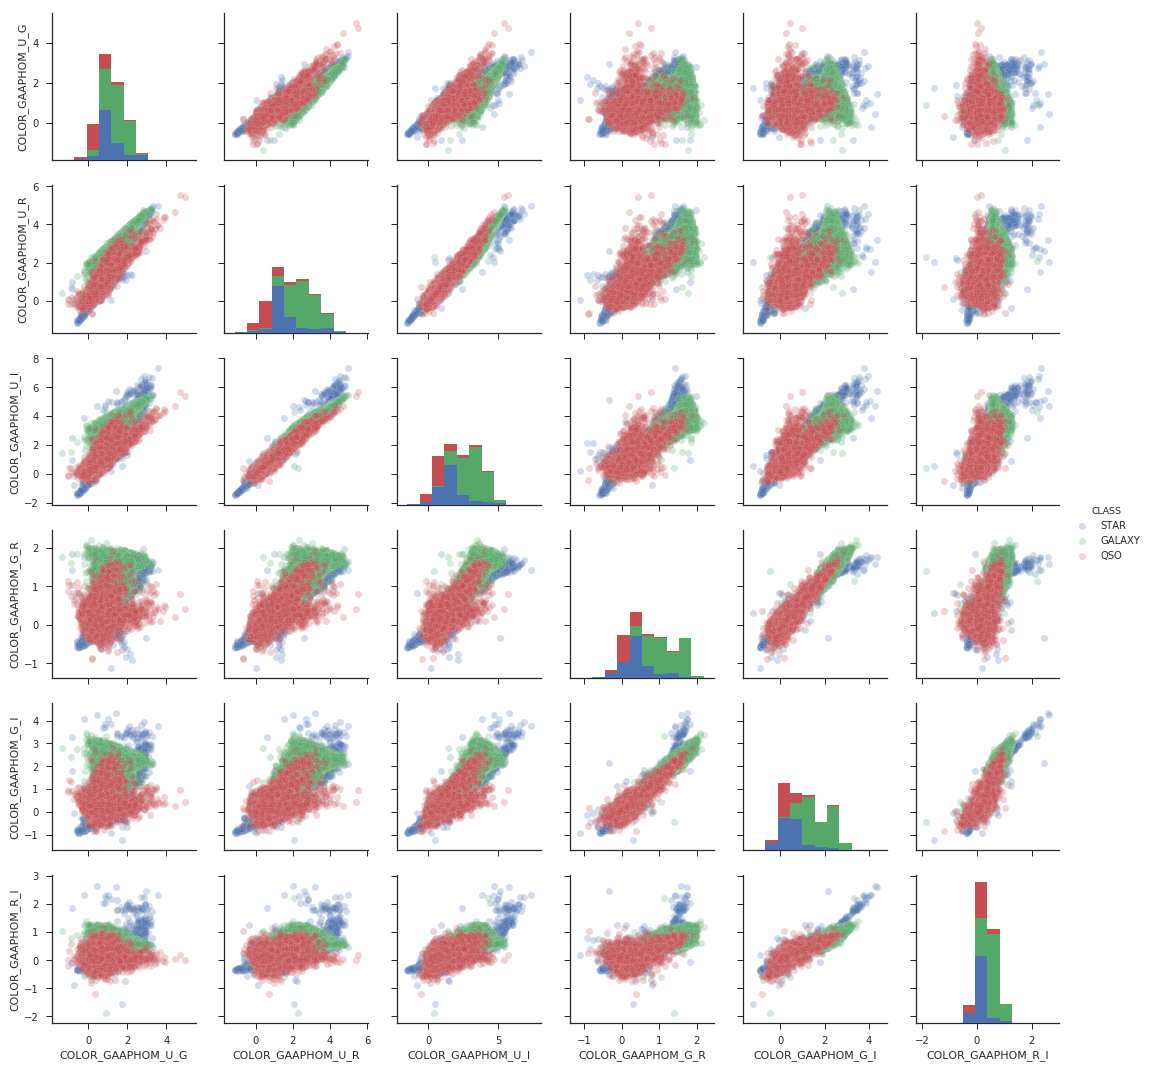

In [28]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

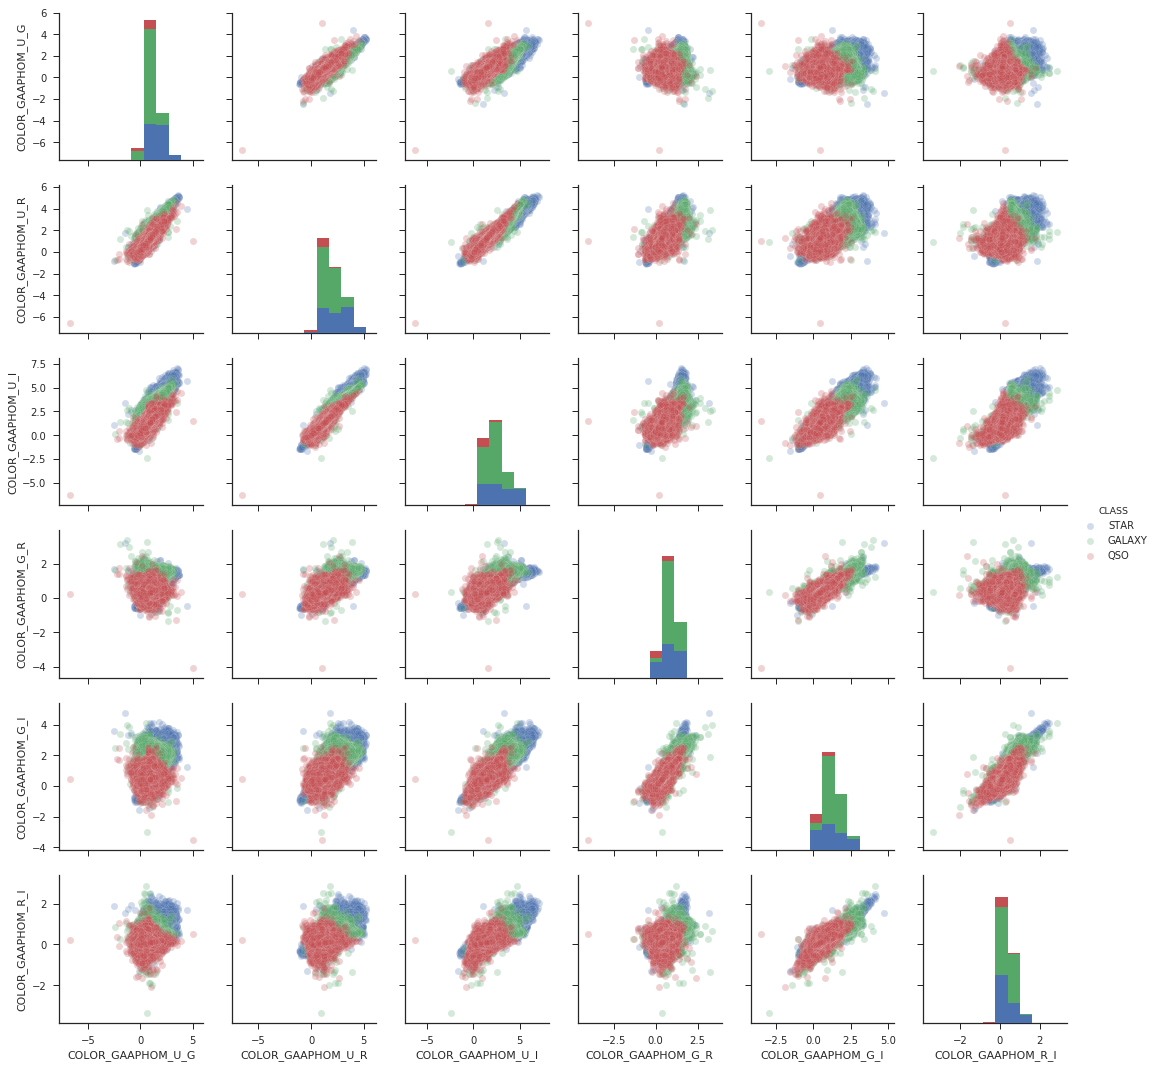

In [29]:
sns.pairplot(catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

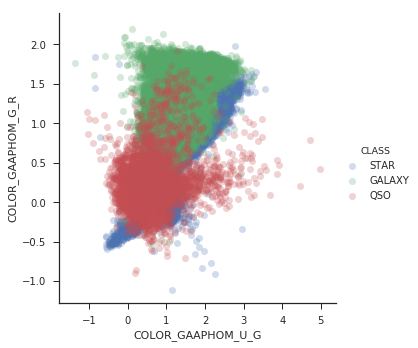

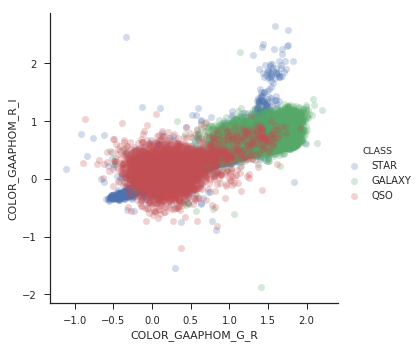

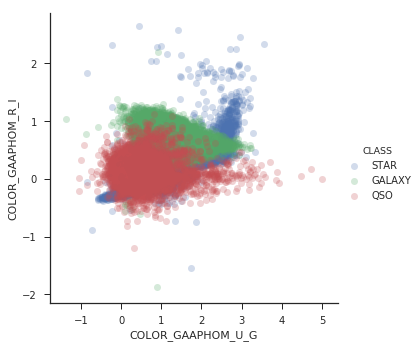

In [30]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

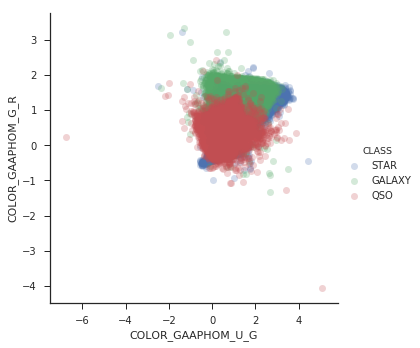

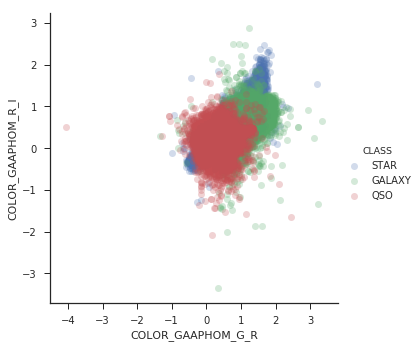

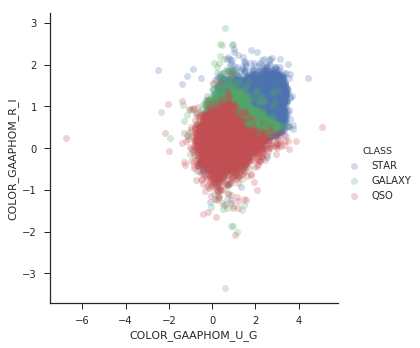

In [31]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

## CLASS_STAR

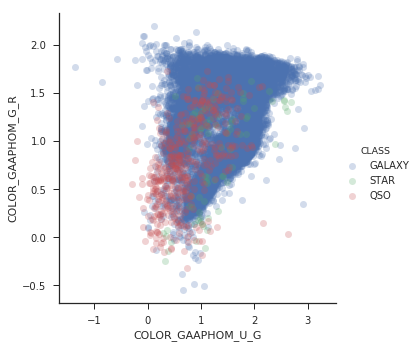

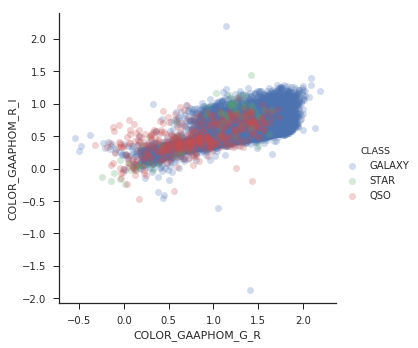

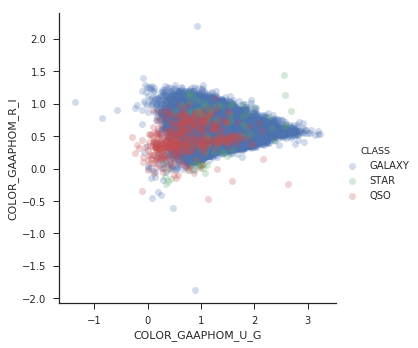

In [49]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

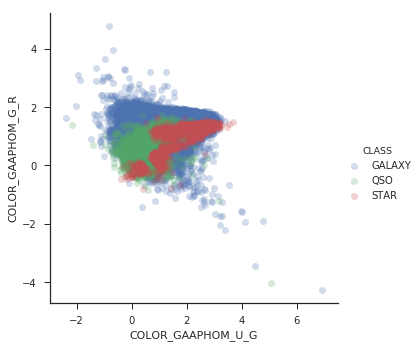

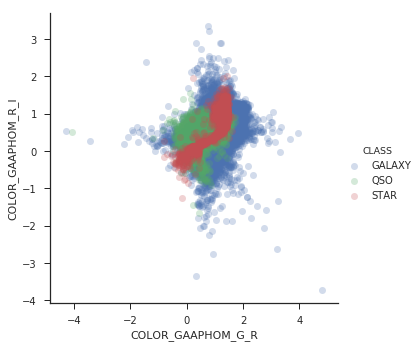

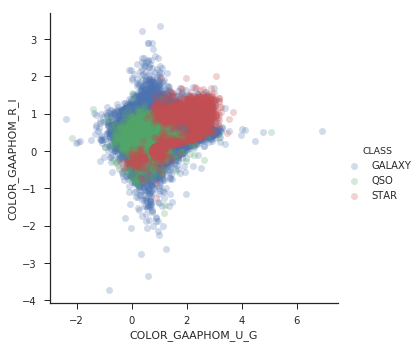

In [50]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_non_star, fit_reg=False, scatter_kws={'alpha': 0.25})

# QSO color pairs

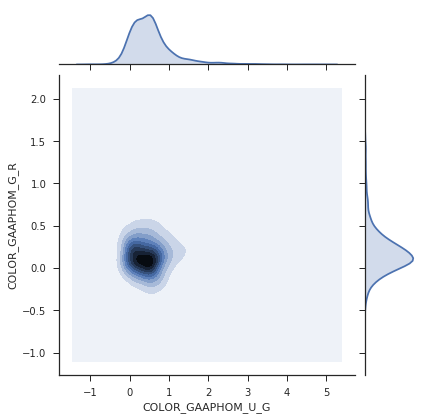

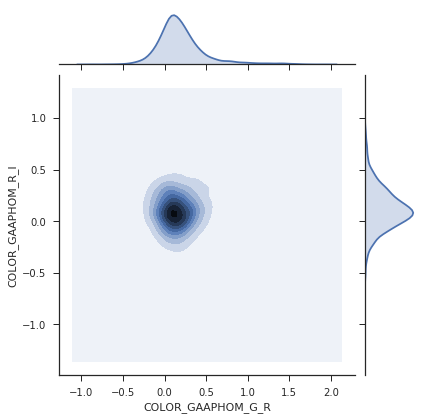

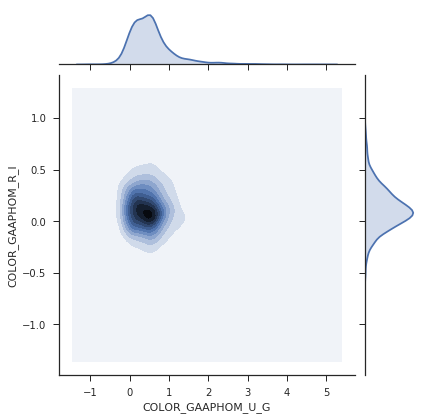

In [32]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

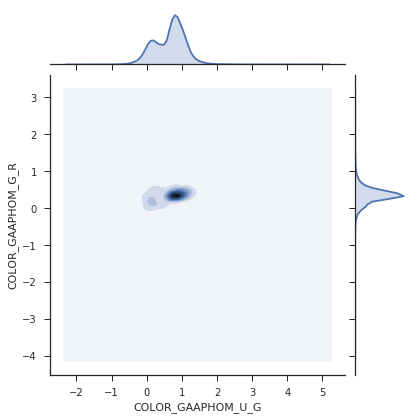

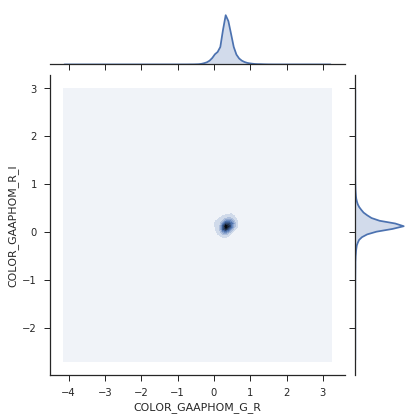

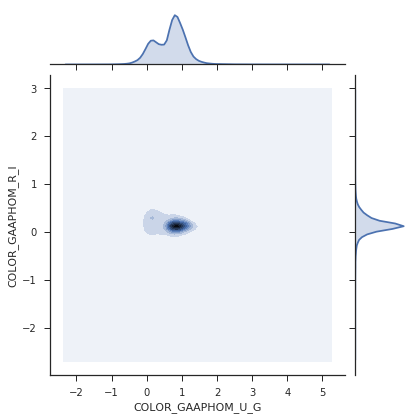

In [33]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_catalog_sampled[b_1], qso_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

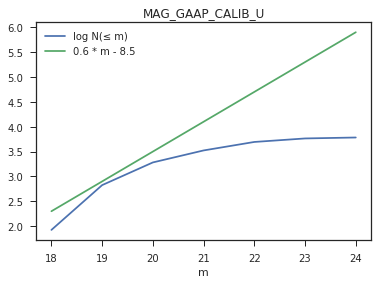

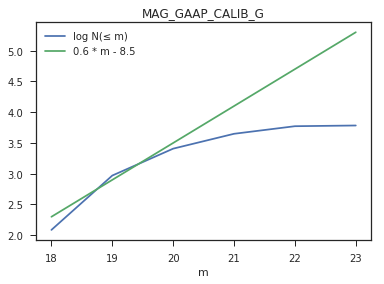

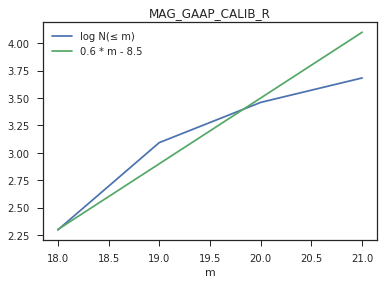

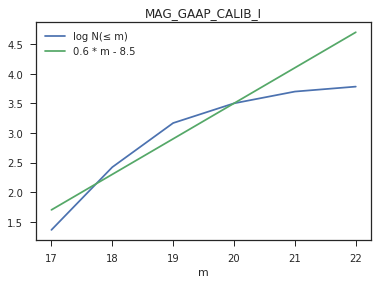

In [34]:
number_count_analysis(qso_kids_sdss, c=8.5)

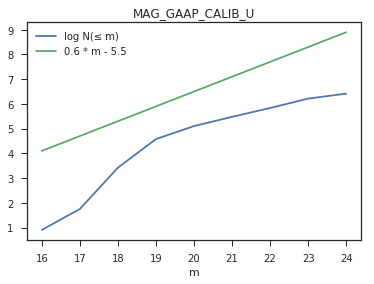

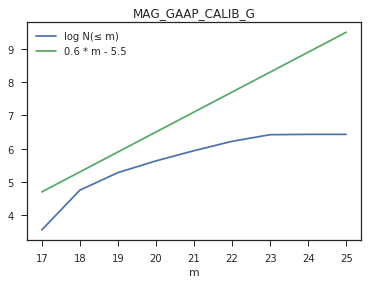

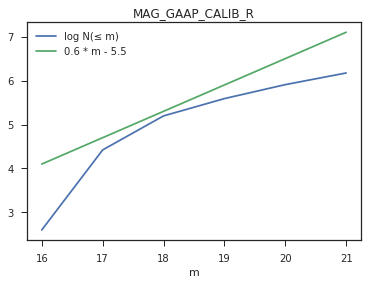

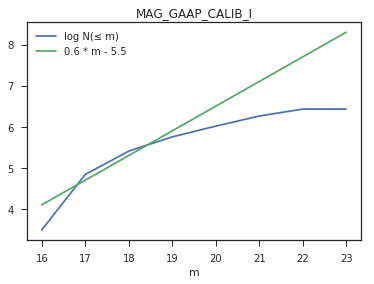

In [35]:
number_count_analysis(catalog, c=5.5)

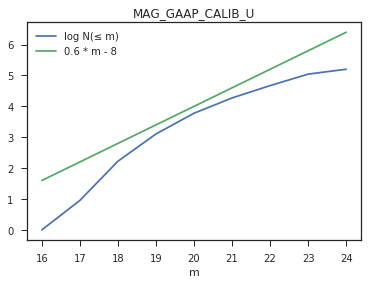

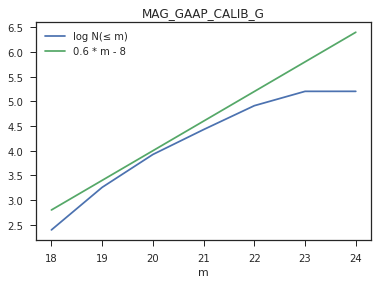

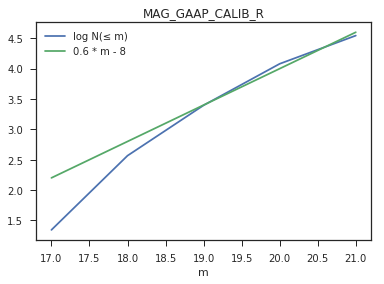

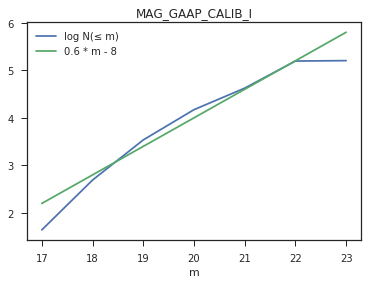

In [36]:
number_count_analysis(qso_catalog, c=8)

# Maps

## Create maps

In [15]:
map_stars, lon, lat = get_weighted_map(nside=128)

In [16]:
map_kids_sdss, _, _ = get_map(kids_x_sdss['GAL_LONG'], kids_x_sdss['GAL_LAT'], nside=128)

In [17]:
map_qso_kids_sdss, _, _ = get_map(qso_kids_sdss['GAL_LONG'], qso_kids_sdss['GAL_LAT'], nside=128)

In [18]:
map_catalog, _, _ = get_map(catalog_star_non_train['GAL_LONG'], catalog_star_non_train['GAL_LAT'], nside=128)

In [25]:
map_catalog_rd, _, _ = get_map(catalog_star_non_train['RAJ2000'], catalog_star_non_train['DECJ2000'], nside=128)

In [19]:
map_qso_catalog, _, _ = get_map(qso_catalog_star_non_train['GAL_LONG'], qso_catalog_star_non_train['GAL_LAT'], nside=128)

In [20]:
map_qso_normalized = normalize_map(map_qso_catalog, map_catalog)

In [21]:
qso_catalog_parts = get_kids_parts(qso_catalog_star_non_train)
catalog_parts = get_kids_parts(catalog_star_non_train)

In [22]:
map_qso_catalog_parts = [get_map(part['GAL_LONG'], part['GAL_LAT'], nside=128)[0] for part in qso_catalog_parts]

In [23]:
map_catalog_parts = [get_map(part['GAL_LONG'], part['GAL_LAT'], nside=128)[0] for part in catalog_parts]

## Correlations

In [44]:
maps_x = [('catalog star', map_catalog), ('QSO', map_qso_catalog), ('QSO norm.', map_qso_normalized)]
maps_x.extend([('catalog part {}'.format(i + 1), m) for i, m in enumerate(map_catalog_parts)])
maps_x.extend([('qso part {}'.format(i + 1), m) for i, m in enumerate(map_qso_catalog_parts)])
maps_y = [('catalog star', map_catalog), ('stars', map_stars), ('train', map_kids_sdss), ('train QSO', map_qso_kids_sdss)]

show_correlations(maps_x, maps_y)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


catalog star     stars     train  train QSO
catalog star        1.000000  0.050682  0.436336   0.413529
QSO                 0.831139  0.024129  0.327231   0.260863
QSO norm.          -0.247903 -0.029695 -0.144699  -0.194798
catalog part 1      1.000000  0.062841  0.587830   0.499358
catalog part 2      0.997052  0.013893  0.622509   0.546308
catalog part 3      0.995071 -0.044401  0.254542   0.231786
catalog part 4      1.000000  0.060187       NaN        NaN
catalog part 5      1.000000 -0.035029       NaN        NaN
qso part 1          0.847110  0.028481  0.664780   0.518019
qso part 2          0.925905  0.022437  0.605434   0.518634
qso part 3          0.714433  0.021952  0.400961   0.285637
qso part 4          0.939214  0.052290       NaN        NaN
qso part 5          0.974263 -0.020412       NaN        NaN

catalog star     stars          train      train QSO
catalog star     0.000000e+00  0.008786  1.250537e-124  6.878353e-111
QSO              0.000000e+00  0.216428   1.386735e-66   4.142720e-42
QSO norm.        4.531752e-38  0.128174   9.281316e-14   7.182669e-24
catalog part 1   0.000000e+00  0.101569   1.991629e-64   3.609217e-44
catalog part 2   0.000000e+00  0.739570   5.365968e-63   4.773917e-46
catalog part 3   0.000000e+00  0.368681   1.628109e-07   1.980880e-06
catalog part 4   0.000000e+00  0.146310   1.000000e+00   1.000000e+00
catalog part 5   0.000000e+00  0.471899   1.000000e+00   1.000000e+00
qso part 1      4.007259e-186  0.461070   6.387616e-87   2.067816e-47
qso part 2      1.820745e-241  0.593608   4.232406e-58   1.996511e-40
qso part 3       5.991865e-65  0.658409   3.441944e-17   4.235428e-09
qso part 4      3.845442e-269  0.209777   1.000000e+00   1.000000e+00
qso part 5      3.226706e-262  0.682509   1.000000e+00   1.000000e+00

catalog star     stars     train  train QSO
catalog star        1.000000  0.050682  0.436336   0.413529
QSO                 0.831139  0.024129  0.327231   0.260863
QSO norm.          -0.247903 -0.029695 -0.144699  -0.194798
catalog part 1      1.000000  0.062841  0.587830   0.499358
catalog part 2      0.997052  0.013893  0.622509   0.546308
catalog part 3      0.995071 -0.044401  0.254542   0.231786
catalog part 4      1.000000  0.060187       NaN        NaN
catalog part 5      1.000000 -0.035029       NaN        NaN
qso part 1          0.847110  0.028481  0.664780   0.518019
qso part 2          0.925905  0.022437  0.605434   0.518634
qso part 3          0.714433  0.021952  0.400961   0.285637
qso part 4          0.939214  0.052290       NaN        NaN
qso part 5          0.974263 -0.020412       NaN        NaN

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


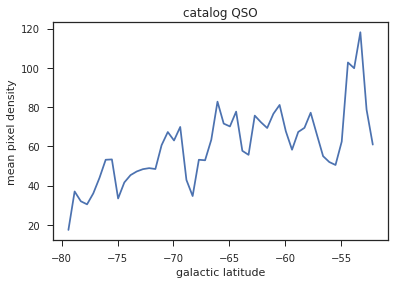

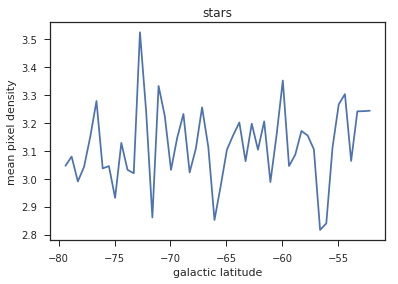

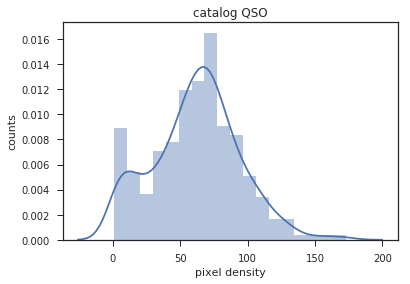

In [45]:
%matplotlib inline
plot_map_stats(map_qso_catalog_parts[3], lat, map_stars, 'catalog QSO')

## Map visualization

<IPython.core.display.Javascript object>


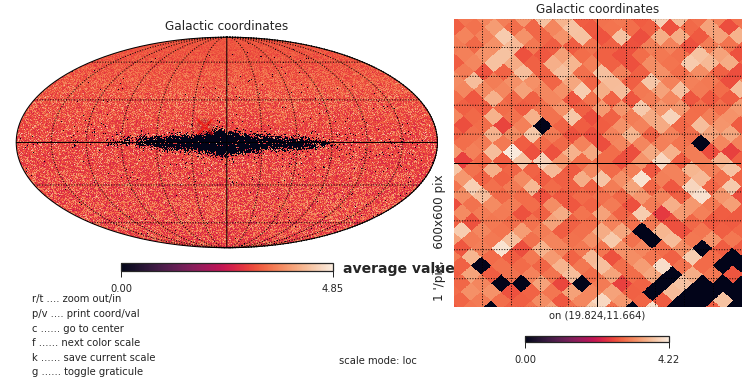

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [13]:
%matplotlib notebook
plot_map(map_stars, unit='average value per pixel', is_cmap=False)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


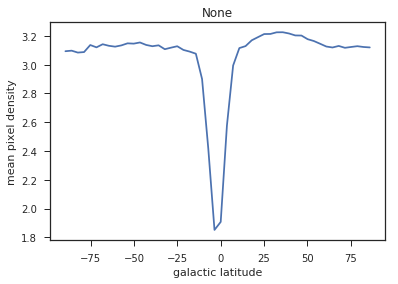

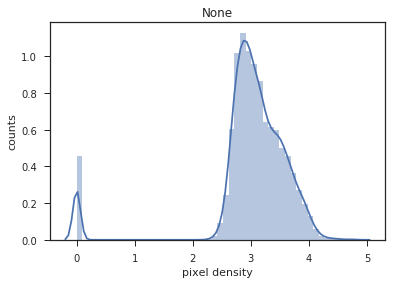

In [24]:
%matplotlib inline
plot_map_stats(map_stars, lat)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


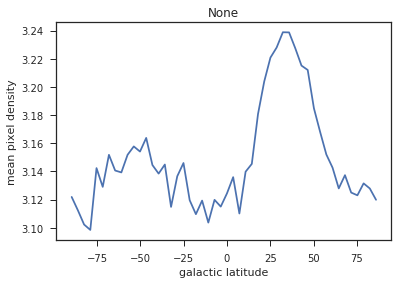

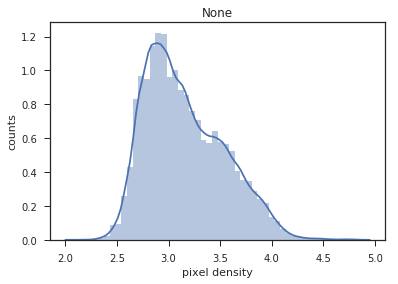

In [25]:
%matplotlib inline
plot_partial_map_stats(map_stars, lat)

<IPython.core.display.Javascript object>


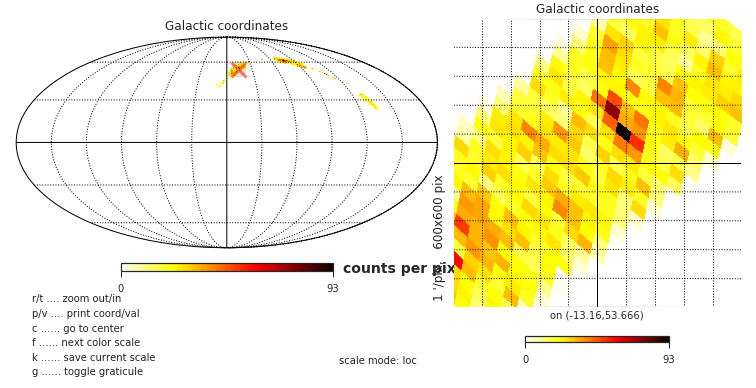

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [15]:
%matplotlib notebook
plot_map(map_kids_sdss)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


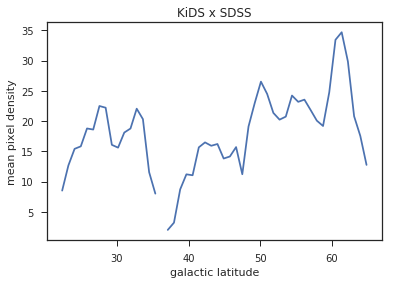

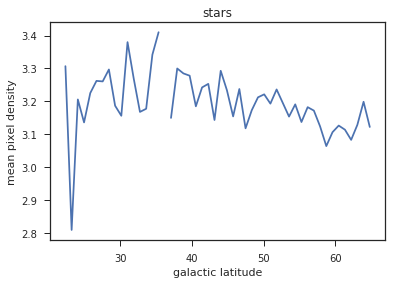

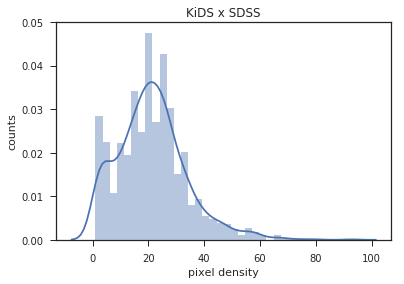

In [27]:
%matplotlib inline
plot_partial_map_stats(map_kids_sdss, lat, map_stars, 'KiDS x SDSS')

<IPython.core.display.Javascript object>


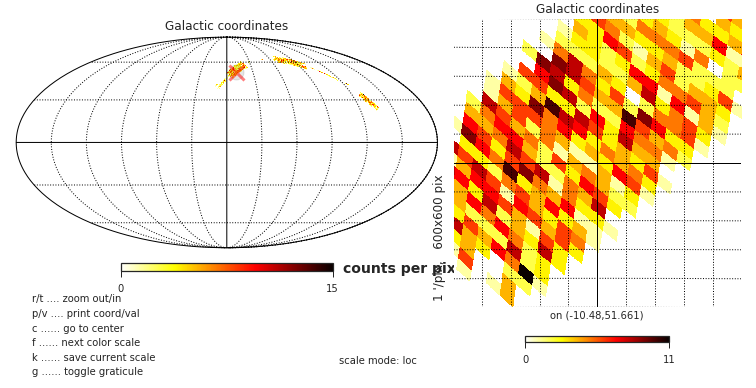

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [17]:
%matplotlib notebook
plot_map(map_qso_kids_sdss)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


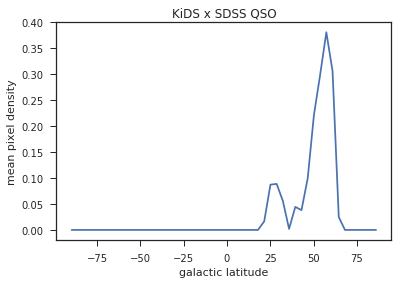

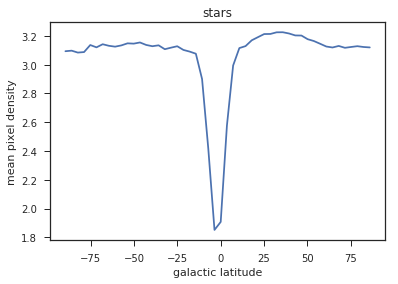

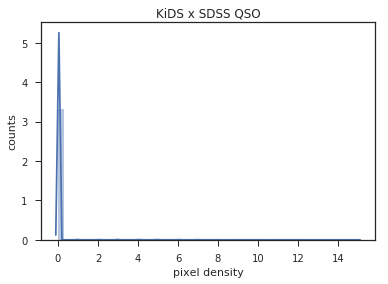

In [29]:
%matplotlib inline
plot_map_stats(map_qso_kids_sdss, lat, map_stars, 'KiDS x SDSS QSO')

<IPython.core.display.Javascript object>


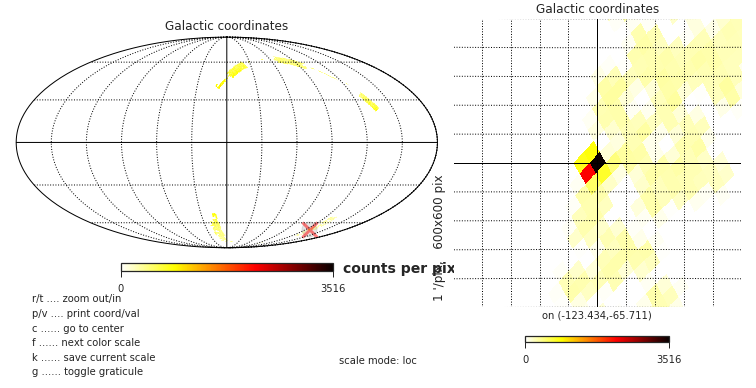

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [24]:
%matplotlib notebook
plot_map(map_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


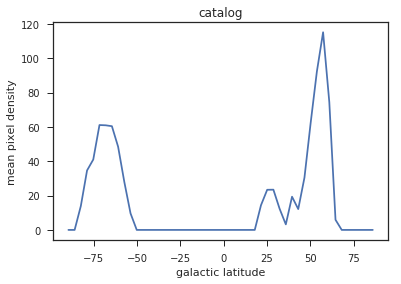

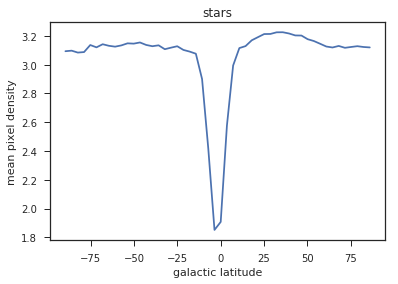

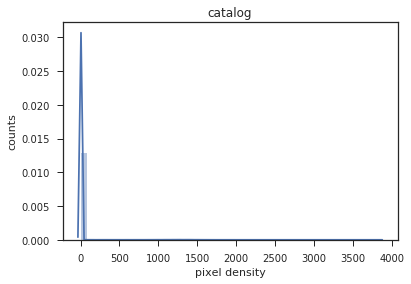

In [31]:
%matplotlib inline
plot_map_stats(map_catalog, lat, map_stars, 'catalog')

<IPython.core.display.Javascript object>


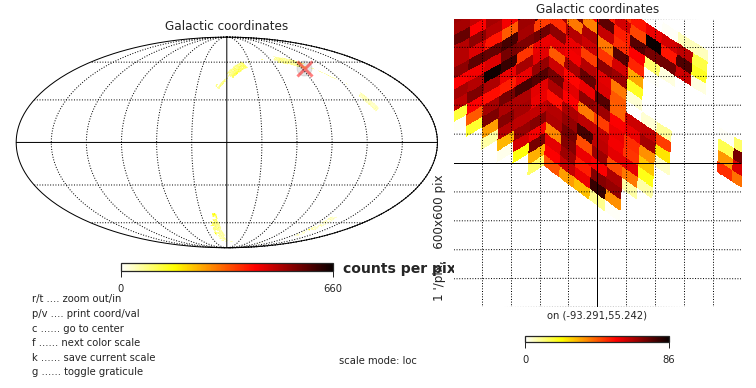

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [49]:
%matplotlib notebook
plot_map(map_qso_catalog)

<IPython.core.display.Javascript object>


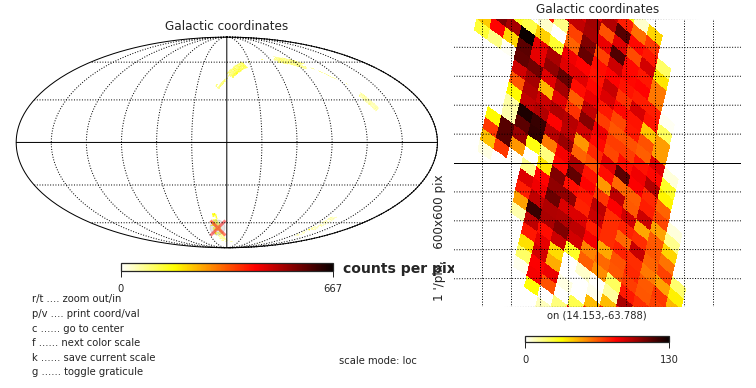

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [117]:
%matplotlib notebook
plot_map(map_qso_catalog)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


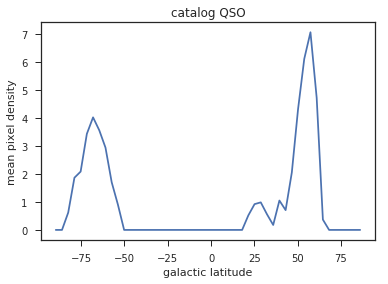

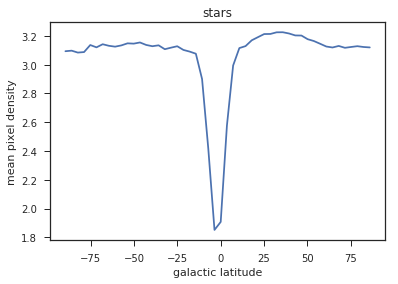

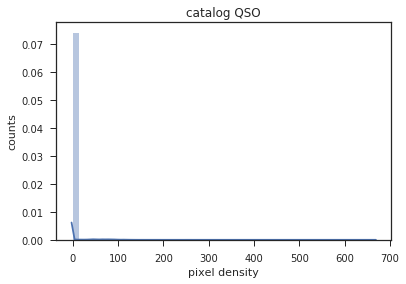

In [31]:
%matplotlib inline
plot_map_stats(map_qso_catalog, lat, map_stars, 'catalog QSO')

<IPython.core.display.Javascript object>


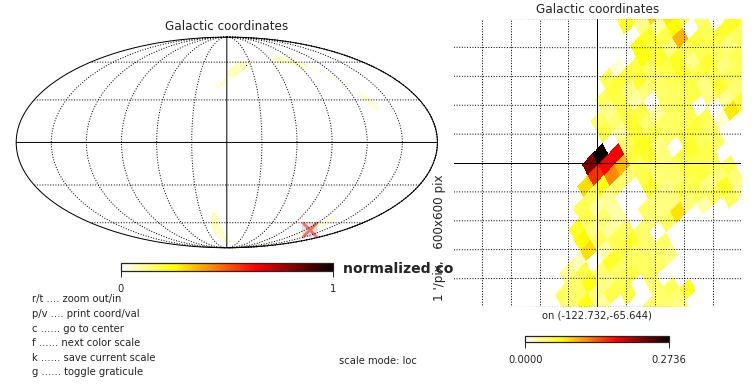

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [16]:
%matplotlib notebook
plot_map(map_qso_normalized, unit='normalized counts per pixel')

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


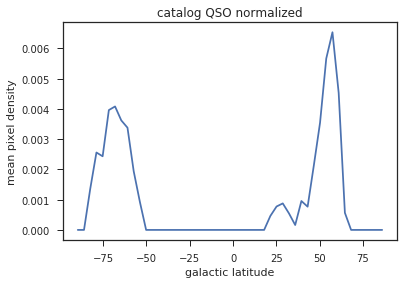

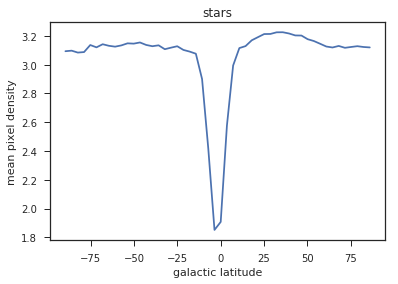

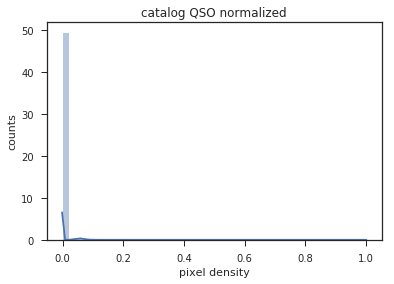

In [39]:
%matplotlib inline
plot_map_stats(map_qso_normalized, lat, map_stars, 'catalog QSO normalized')

In [33]:
%matplotlib notebook
plot_map(map_qso_catalog_non_star)

NameError: name 'map_qso_catalog_non_star' is not defined

<IPython.core.display.Javascript object>


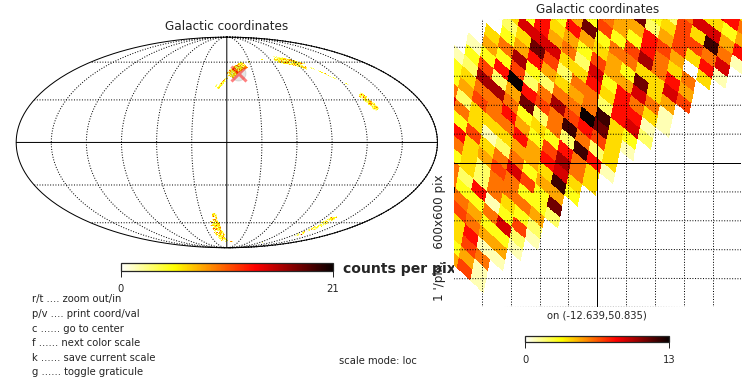

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
82.976115752711 97.023884247289 -7.023884247289008 7.023884247289008
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


In [23]:
%matplotlib notebook
plot_map(map_qso_catalog_non_star)

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


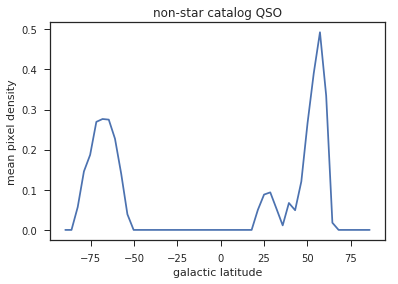

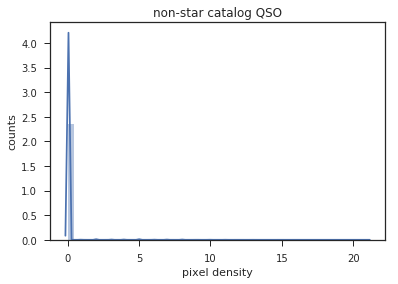

In [48]:
%matplotlib inline
plot_map_stats(map_qso_catalog_non_star, lat, title='non-star catalog QSO')

# Predictions

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


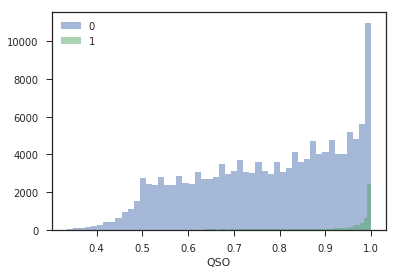

In [43]:
for t in [0, 1]:
    sns.distplot(catalog_star.loc[(catalog_star['train'] == t) & (catalog_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


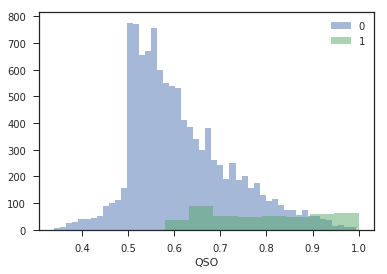

In [44]:
for t in [0, 1]:
    sns.distplot(catalog_non_star.loc[(catalog_non_star['train'] == t) & (catalog_non_star['CLASS'] == 'QSO')]['QSO'], label=str(t), kde=False, rug=False, hist_kws={'alpha': 0.5})
plt.legend()